In [80]:
pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 5.8 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import numpy as np
import re
from sklearn.cluster import KMeans


In [82]:
df=pd.read_csv('sushi.csv')
df.head()

,Name,Rating,Reviews,Price,Location
0,Shikibu Restaurant,4.5,409,$$,"{'address1': '10834 Washington Blvd', 'address..."
1,Yama Sushi Sake Attitude,5.0,214,$$,"{'address1': '11709 National Blvd', 'address2'..."
2,Uzumaki,4.5,669,$$,"{'address1': '11060 Washington Blvd', 'address..."
3,Izakaya Osen - Los Angeles,4.5,1631,$$,"{'address1': '2903 Sunset Blvd', 'address2': '..."
4,Roll Call - Koreatown,4.5,532,$$,"{'address1': '3183 Wilshire Blvd', 'address2':..."


In [83]:
len(df)

1000

In [84]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the 'Location' column

# Define a function to extract the number of dollar signs
def extract_dollar_signs(price):
    if isinstance(price, str):
        return price.count('$')
    else:
        return 0

# Define a function to extract the street name
def extract_address_info(location):
    # Handle the case when the value is not a string
    if not isinstance(location, str):
        return '', '', ''

    # Convert the string to a dictionary
    location_dict = eval(location)

    # Extract the street address from the 'address1' key
    address = location_dict.get('address1')

    # Extract the ZIP code
    zip_code = location_dict.get('zip_code')

    # Extract the city name
    city = location_dict.get('city')

    # Check if the address exists and extract the street name
    if address:
        street_name = address.split(' ')[1]
        return street_name, zip_code, city
    else:
        return '', zip_code, city


# Apply the functions to create new columns
df['Price'] = df['Price'].apply(extract_dollar_signs)
df[['Street Name', 'Zip Code', 'City']] = df['Location'].apply(extract_address_info).apply(pd.Series)

# Print the updated DataFrame
df.drop('Location', axis=1, inplace=True)
df


,Name,Rating,Reviews,Price,Street Name,Zip Code,City
0,Shikibu Restaurant,4.5,409,2,Washington,90232,CULVER CITY
1,Yama Sushi Sake Attitude,5.0,214,2,National,90064,Los Angeles
2,Uzumaki,4.5,669,2,Washington,90232,Culver City
3,Izakaya Osen - Los Angeles,4.5,1631,2,Sunset,90026,Los Angeles
4,Roll Call - Koreatown,4.5,532,2,Wilshire,90010,Los Angeles
...,...,...,...,...,...,...,...
995,Itacho Ramen & Sushi,5.0,1,0,S,90017,Los Angeles
996,Okamoto Kitchen,4.0,663,2,,91423,Los Angeles
997,Midori Sushi - Encino,3.5,1034,2,Ventura,91316,Encino
998,Reel Inn Malibu,3.5,1136,2,Pacific,90265,Malibu


In [85]:
# Select the features for clustering
features = ['Rating', 'Reviews', 'Price']

# Create a subset DataFrame with only the selected features
data = df[features]

# Perform k-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Add a new column to the DataFrame with the cluster labels
df['Cluster'] = kmeans.labels_

# Print the updated DataFrame
df

/Users/qefsquintillion/opt/anaconda3/envs/citation-analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Rating,Reviews,Price,Street Name,Zip Code,City,Cluster
0,Shikibu Restaurant,4.5,409,2,Washington,90232,CULVER CITY,1
1,Yama Sushi Sake Attitude,5.0,214,2,National,90064,Los Angeles,1
2,Uzumaki,4.5,669,2,Washington,90232,Culver City,1
3,Izakaya Osen - Los Angeles,4.5,1631,2,Sunset,90026,Los Angeles,0
4,Roll Call - Koreatown,4.5,532,2,Wilshire,90010,Los Angeles,1
...,...,...,...,...,...,...,...,...
995,Itacho Ramen & Sushi,5.0,1,0,S,90017,Los Angeles,1
996,Okamoto Kitchen,4.0,663,2,,91423,Los Angeles,1
997,Midori Sushi - Encino,3.5,1034,2,Ventura,91316,Encino,0
998,Reel Inn Malibu,3.5,1136,2,Pacific,90265,Malibu,0


In [86]:
df['Cluster'].value_counts()

1    778
0    185
2     37
Name: Cluster, dtype: int64

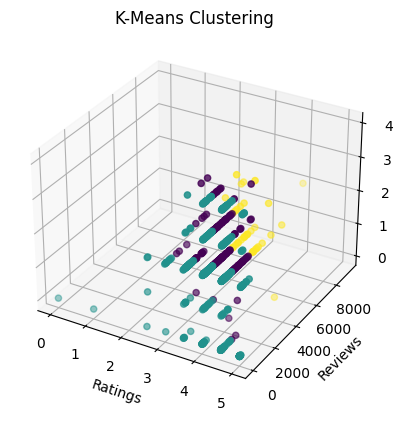

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have a DataFrame 'df' with three features 'Feature1', 'Feature2', and 'Feature3', and a 'Cluster' column

# Create a 3D scatter plot of the data points, colored by cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Rating'], df['Reviews'], df['Price'], c=df['Cluster'], cmap='viridis')

# Add labels and title to the plot
ax.set_xlabel('Ratings')
ax.set_ylabel('Reviews')
ax.set_zlabel('Price')
ax.set_title('K-Means Clustering')

# Show the plot
plt.show()


In [91]:
import pickle 
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
